# Descripción del proyecto 

Se trabaja para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Se deben identificar patrones que determinen si un juego tiene éxito o no. Esto permitirá detectar proyectos prometedores y planificar campañas publicitarias.

En el desarrollo de este proyecto hay datos que se remontan a 2016. Trabajaremos sobre la base que es diciembre de 2016 y se está planeando una campaña para 2017.

El dataset contiene una columna "rating" que almacena la clasificación ESRB de cada juego. El Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.

El proyecto abordará 3 etapas principales:

En la etapa 1, proporcionará una descripción general de los tipos de datos y tratamiento de los valores ausentes del archivo "games.csv". En la etapa 2 se analizarán las ventas de cada videojuego por plataforma, género y región. Finalmente, en la etapa 3,  se realizará un test de hipotesis siguiendo los pasos de programación necesarios para probar si las calificaciones promedio de los usuarios varían para ciertos géneros y plataformas.

## Desarrollo del proyecto

### Inicialización

In [1]:
#Cargar todas las librerías
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats as st
import numpy as np
import seaborn as sns 


### Abrir el archivo y estudiar la información general

In [2]:
games = pd.read_csv('/datasets/games.csv')

### Preparar los datos

#### Información general del dataframa en estudio

In [3]:
#Información general de las llamadas
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
#Imprime una muestra de los juegos
games.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


#### Reemplazar los nombres de las columnas por minúsculas

In [5]:
#Reemplazar los nombres de las columnas por minúsculas

games.columns = games.columns.str.lower()
games.head()


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


#### Convertir columnas al tipo de dato necesario

Es necesario cambiar el tipo de dato de la columna "user score" a tipo float, sin embargo, dado que dicha columna contiene elementos de tipo string (tbd), primeramente se reemplazarán todas las filas que contengan el string tbd, por NaN. Descartar estos valores no es opción, ya que representa alrededor del 14% de los datos como se muestra a continuación:


In [6]:
#Calcular el porcentaje de elementos que contienen tbd entre el total de datos

games[games["user_score"]=="tbd"]


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


In [7]:
print(2424/16715 )

0.1450194436135208


In [8]:
#Reemplazar los elementos tbd por NaN y luego cambiar datos de columna a tipo de dato float

games["user_score"] = games["user_score"].replace("tbd",np.nan).astype(float)

In [9]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


#### Tratamiento de valores ausentes

* Valores ausentes para "rating":
Observamos que tenemos un 40% de valores ausentes para la columna "rating". En este caso conviene no imputar los valores nulos, dado su alto porcentaje de valores ausentes respecto a la data. Con esto buscamos no manipular la data por nuestra cuenta.

* Valores ausentes para "rating" "critic_score" , "user_score":
Imputaremos los valores nulos de las columnas "critic_score" y "user_score" con la mediana de dichas columnas agrupadas por género.

In [10]:
#Imputación de valores ausentes para critic_score
imputación_critic_score = games.groupby("genre")["critic_score"].median()
imputación_critic_score

genre
Action          68.0
Adventure       66.0
Fighting        72.0
Misc            69.0
Platform        69.0
Puzzle          70.0
Racing          69.0
Role-Playing    74.0
Shooter         73.0
Simulation      70.0
Sports          75.0
Strategy        73.0
Name: critic_score, dtype: float64

In [11]:
games["critic_score_corregido"] = games.set_index("genre")["critic_score"].fillna(imputación_critic_score).reset_index(drop =True)

In [12]:
#Imputación de valores ausentes para user_score
imputación_user_score = games.groupby("genre")["user_score"].median()
imputación_user_score

genre
Action          7.4
Adventure       7.6
Fighting        7.6
Misc            7.1
Platform        7.7
Puzzle          7.5
Racing          7.4
Role-Playing    7.8
Shooter         7.4
Simulation      7.5
Sports          7.4
Strategy        7.8
Name: user_score, dtype: float64

In [13]:
games["user_score_corregido"] = games.set_index("genre")["user_score"].fillna(imputación_user_score).reset_index(drop =True)

In [14]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    16713 non-null  object 
 1   platform                16715 non-null  object 
 2   year_of_release         16446 non-null  float64
 3   genre                   16713 non-null  object 
 4   na_sales                16715 non-null  float64
 5   eu_sales                16715 non-null  float64
 6   jp_sales                16715 non-null  float64
 7   other_sales             16715 non-null  float64
 8   critic_score            8137 non-null   float64
 9   user_score              7590 non-null   float64
 10  rating                  9949 non-null   object 
 11  critic_score_corregido  16713 non-null  float64
 12  user_score_corregido    16713 non-null  float64
dtypes: float64(9), object(4)
memory usage: 1.7+ MB


* Valores ausentes para "name y "genre": Se observa que en estas columna solo contamos con 2 valores ausentes. Como no hay posibilidad de imputar dichos valores con alguna métrica, además de que dichas filas no aportan datos respecto a puntuación de critica y de usuarios, se procederá a eliminar estas filas.

In [15]:
#Filtrar valores ausentes de la columna "name"

games[games["name"].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,critic_score_corregido,user_score_corregido
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN,NaN,NaN


In [16]:
#Eliminar filas con valores ausentes de la columna "name" (las cuales son las mismas para la columna "genre")

games = games.dropna(subset=['name'])
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    16713 non-null  object 
 1   platform                16713 non-null  object 
 2   year_of_release         16444 non-null  float64
 3   genre                   16713 non-null  object 
 4   na_sales                16713 non-null  float64
 5   eu_sales                16713 non-null  float64
 6   jp_sales                16713 non-null  float64
 7   other_sales             16713 non-null  float64
 8   critic_score            8137 non-null   float64
 9   user_score              7590 non-null   float64
 10  rating                  9949 non-null   object 
 11  critic_score_corregido  16713 non-null  float64
 12  user_score_corregido    16713 non-null  float64
dtypes: float64(9), object(4)
memory usage: 1.8+ MB


* Valores ausentes para "year_of_release": Contamos con 269 filas que presentan valores ausentes para esta columna. En este caso nos apoyaremos del año de lanzamiento de otras plataformas para completar valores ausentes en las plataformas que los contengan.

In [17]:
columna_imputación = games.groupby("name")["year_of_release"].max()
columna_imputación

name
 Beyblade Burst                 2016.0
 Fire Emblem Fates              2015.0
 Frozen: Olaf's Quest           2013.0
 Haikyu!! Cross Team Match!     2016.0
 Tales of Xillia 2              2012.0
                                 ...  
thinkSMART: Chess for Kids      2011.0
uDraw Studio                    2010.0
uDraw Studio: Instant Artist    2011.0
wwe Smackdown vs. Raw 2006         NaN
¡Shin Chan Flipa en colores!    2007.0
Name: year_of_release, Length: 11559, dtype: float64

In [18]:
games.set_index("name")["year_of_release"].fillna(columna_imputación).reset_index(drop =True)

0        2006.0
1        1985.0
2        2008.0
3        2009.0
4        1996.0
          ...  
16708    2016.0
16709    2006.0
16710    2016.0
16711    2003.0
16712    2016.0
Name: year_of_release, Length: 16713, dtype: float64

In [19]:
games["year_of_release_corregido"] = games.set_index("name")["year_of_release"].fillna(columna_imputación).reset_index(drop =True)

A continuación se presenta una comparación entre la columna "year_of_release" con sus respectivos valores nulos versus la nueva columna "year_of_release_corregido".

In [20]:
games[games["year_of_release"].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,critic_score_corregido,user_score_corregido,year_of_release_corregido
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E,94.0,8.5,2003.0
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E,84.0,6.4,2003.0
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+,74.0,7.9,2008.0
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN,72.0,7.6,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN,73.0,7.4,2002.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+,43.0,7.4,2011.0
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T,69.0,6.5,2008.0
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M,59.0,6.7,2013.0
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN,66.0,7.6,2013.0


In [21]:
games[games["critic_score"].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,critic_score_corregido,user_score_corregido,year_of_release_corregido
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,69.0,7.7,1985.0
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,74.0,7.8,1996.0
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,70.0,7.5,1989.0
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,73.0,7.4,1984.0
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN,70.0,7.5,2005.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,68.0,7.4,2016.0
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,75.0,7.4,2003.0
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,66.0,7.6,2016.0
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,69.0,7.7,NaN


Se observa que hemos reducido la cantidad de valores nulos de year_or_release en 121 filas.

In [22]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   name                       16713 non-null  object 
 1   platform                   16713 non-null  object 
 2   year_of_release            16444 non-null  float64
 3   genre                      16713 non-null  object 
 4   na_sales                   16713 non-null  float64
 5   eu_sales                   16713 non-null  float64
 6   jp_sales                   16713 non-null  float64
 7   other_sales                16713 non-null  float64
 8   critic_score               8137 non-null   float64
 9   user_score                 7590 non-null   float64
 10  rating                     9949 non-null   object 
 11  critic_score_corregido     16713 non-null  float64
 12  user_score_corregido       16713 non-null  float64
 13  year_of_release_corregido  16565 non-null  flo

In [23]:
#Modificación de columna "year_of_release" imputando parte de los valores ausentes
games["year_of_release"] = games.set_index("name")["year_of_release"].fillna(columna_imputación).reset_index(drop =True)

In [24]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   name                       16713 non-null  object 
 1   platform                   16713 non-null  object 
 2   year_of_release            16565 non-null  float64
 3   genre                      16713 non-null  object 
 4   na_sales                   16713 non-null  float64
 5   eu_sales                   16713 non-null  float64
 6   jp_sales                   16713 non-null  float64
 7   other_sales                16713 non-null  float64
 8   critic_score               8137 non-null   float64
 9   user_score                 7590 non-null   float64
 10  rating                     9949 non-null   object 
 11  critic_score_corregido     16713 non-null  float64
 12  user_score_corregido       16713 non-null  float64
 13  year_of_release_corregido  16565 non-null  flo

Se observa que se reeplazaron 121 filas con valores que antes presentaban valores ausentes. Para las 148 filas restantes con valores ausentes, se decide no eliminarlas dado que podría aportar información para el análisis.

#### Calcular las ventas totales para cada juego

In [25]:
games["ventas_totales"] = games["na_sales"] + games["eu_sales"] + games["jp_sales"] + games["other_sales"]

In [26]:
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,critic_score_corregido,user_score_corregido,year_of_release_corregido,ventas_totales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,76.0,8.0,2006.0,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,69.0,7.7,1985.0,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,82.0,8.3,2008.0,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,80.0,8.0,2009.0,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,74.0,7.8,1996.0,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,68.0,7.4,2016.0,0.01
16711,LMA Manager 2007,X360,2003.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,75.0,7.4,2003.0,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,66.0,7.6,2016.0,0.01
16713,Spirits & Spells,GBA,NaN,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,69.0,7.7,NaN,0.01


### Analisis los datos

#### Cantidad de juegos lanzados en diferentes años

    year_of_release  name
0            1980.0     9
1            1981.0    46
2            1982.0    36
3            1983.0    17
4            1984.0    14
5            1985.0    14
6            1986.0    21
7            1987.0    16
8            1988.0    15
9            1989.0    17
10           1990.0    16
11           1991.0    41
12           1992.0    43
13           1993.0    60
14           1994.0   121
15           1995.0   219
16           1996.0   263
17           1997.0   289
18           1998.0   379
19           1999.0   339
20           2000.0   350
21           2001.0   484
22           2002.0   845
23           2003.0   785
24           2004.0   765
25           2005.0   946
26           2006.0  1020
27           2007.0  1202
28           2008.0  1440
29           2009.0  1431
30           2010.0  1271
31           2011.0  1152
32           2012.0   662
33           2013.0   547
34           2014.0   582
35           2015.0   606
36           2016.0   502


<AxesSubplot:xlabel='year_of_release'>

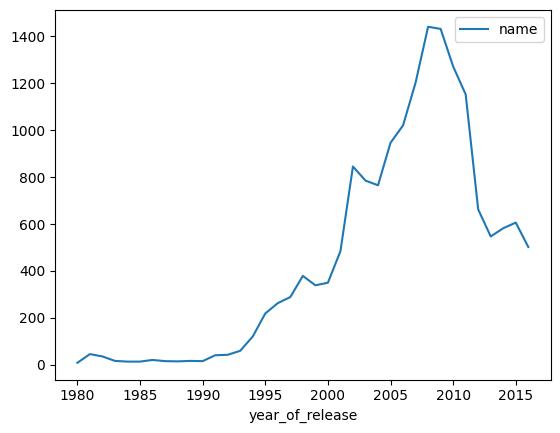

In [27]:
cantidad_juegos = games.groupby("year_of_release")["name"].count().reset_index()
print(cantidad_juegos)
cantidad_juegos.plot(kind="line", x="year_of_release", y="name")

Desde el año 2000 hacia atrás el volumen de las ventas es bajo en compración a periodos posteriores. Por otro lado se observa que existen años con picos de venta, siendo el 2008 el año con mayor cantidad de lanzamientos. A partir de ese periodo la cantidad de lanzamientos comienza a decrecer hasta el año 2016.

 #### Ventas por plataforma
 
 

##### Plataformas con las mayores ventas totales y su distribución

In [28]:
ventas_por_plataforma = games.pivot_table(index = "platform", values = "ventas_totales", aggfunc = "sum")
ventas_por_plataforma.sort_values(by = "ventas_totales" , ascending = False).head()

,ventas_totales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12


In [29]:
platform_list = ("PS2","X360","PS3","Wii","DS")
games_filtrada = games[games["platform"].isin(platform_list)]
games_filtrada


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,critic_score_corregido,user_score_corregido,year_of_release_corregido,ventas_totales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,76.0,8.0,2006.0,82.54
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,82.0,8.3,2008.0,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,80.0,8.0,2009.0,32.77
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,89.0,8.5,2006.0,29.80
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,58.0,6.6,2006.0,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16700,Mezase!! Tsuri Master DS,DS,2011.0,Sports,0.00,0.00,0.01,0.00,NaN,NaN,NaN,75.0,7.4,2011.0,0.01
16704,Plushees,DS,2003.0,Simulation,0.01,0.00,0.00,0.00,NaN,NaN,E,70.0,7.5,2003.0,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2006.0,Racing,0.00,0.00,0.00,0.00,NaN,NaN,NaN,69.0,7.4,2006.0,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,68.0,7.4,2016.0,0.01


In [30]:
distribucion_por_plataforma = games_filtrada.groupby(["year_of_release","platform"])["ventas_totales"].sum().reset_index()
distribucion_por_plataforma

,year_of_release,platform,ventas_totales
0,1980.0,PS2,0.76
1,1980.0,Wii,0.50
2,1980.0,X360,0.57
3,1981.0,DS,1.44
4,1981.0,PS2,6.51
...,...,...,...
160,2016.0,DS,7.79
161,2016.0,PS2,17.23
162,2016.0,PS3,7.32
163,2016.0,Wii,7.39


<AxesSubplot:xlabel='year_of_release', ylabel='ventas_totales'>

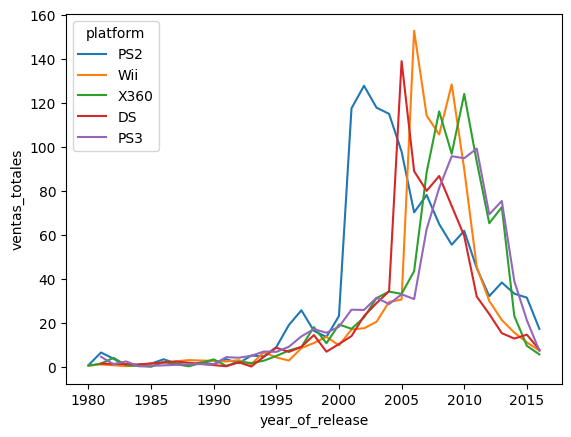

In [31]:
sns.lineplot(data=distribucion_por_plataforma, x = "year_of_release", y = "ventas_totales", hue = "platform")

##### Plataformas que solían ser populares pero ya no lo son


In [32]:
distribucion_total_platafromas = games.groupby(["year_of_release","platform"])["ventas_totales"].sum().reset_index()
distribucion_total_platafromas

,year_of_release,platform,ventas_totales
0,1980.0,2600,7.34
1,1980.0,PC,1.16
2,1980.0,PS2,0.76
3,1980.0,PSP,1.05
4,1980.0,Wii,0.50
...,...,...,...
719,2016.0,Wii,7.39
720,2016.0,WiiU,1.56
721,2016.0,X360,5.62
722,2016.0,XB,4.09


<AxesSubplot:xlabel='year_of_release', ylabel='ventas_totales'>

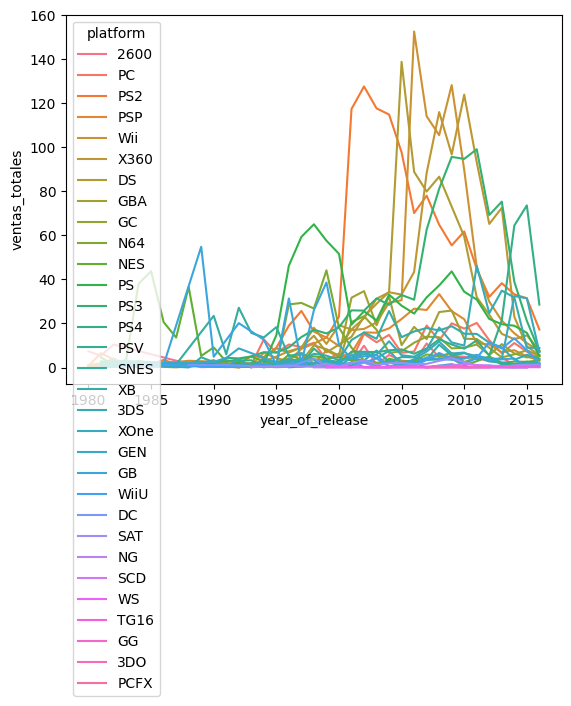

In [33]:
sns.lineplot(data=distribucion_total_platafromas, x = "year_of_release", y = "ventas_totales", hue = "platform")

Del gráfico de lineas, se observa un comportamiento similar en practicamente todas las platafomas, es decir, sus ventas aumentan  y luego decrecen sus ventas. El tiempo de vida por plataforma es de 5 años aproximadamente. Además hay plataformas que fueron populares desde 1995 hasta el 2000, como en el caso de "PS" Y "NES".

Para graficar de mejor forma este comportamiento, tomaremos como referencia las plataformas de nintendo:

<AxesSubplot:xlabel='year_of_release'>

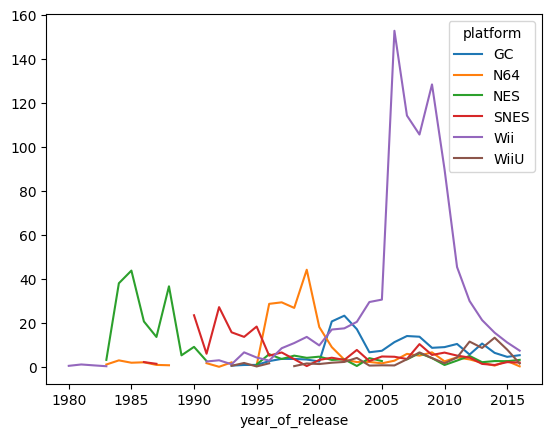

In [34]:
nintendo_platforms = ["NES", "SNES", "N64", "GC", "Wii", "WiiU"]
games[games["platform"].isin(nintendo_platforms)].pivot_table(index="year_of_release",
                                                              columns="platform",
                                                              values ="ventas_totales",aggfunc="sum").plot(kind="line")

Se observa que las ventas por plataforma de nintendo tienen un comportamiento creciente en sus ventas para luego disminuirlas. El horizonte de tiempo en el cual una cosola se presenta en el mercado hasta que sus ventas disminuyen es de aproximadamente 5 años.

#### Determinar periodo de datos

Se tomará un periodo de 5 años, desde el 2001 hasta el 2016.

In [35]:
games_filtrada_final = games.query("year_of_release >= 2011")

#### Crear un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma

<AxesSubplot:xlabel='ventas_totales', ylabel='platform'>

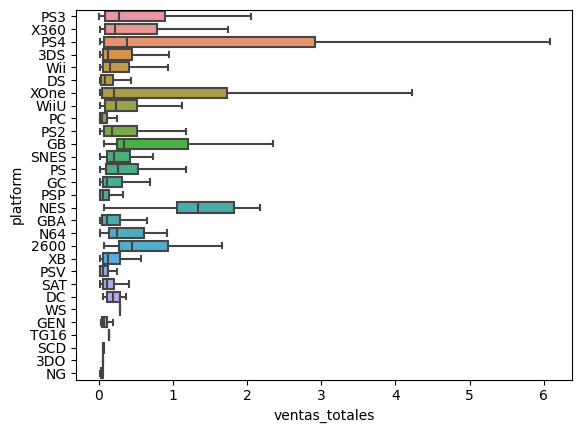

In [36]:
sns.boxplot(data = games_filtrada_final, x = "ventas_totales", y= "platform", showfliers = False)


Podemos ver que la distribución de la plataforma "GB" está fuertemente sesgada hacia la derecha, lo que indica que la media será mayor que la mediana. Esto también implica que los usuarios que prefieren esta platadorma que terminan gastando grandes cantidades de dinero; podríamos promocionar versiones mas actualizadas para atraer a estas personas a preferir esta consola.

Tambien se observa que la plataforma "NES" es la que presenta mayor media, pero una variabilidad bastante alta y similar a la plataforma GB. Otras plataformas que presentan mayor homogeneidad en sus datos respecto a sus rivales serían "X360" y "PS3", lo cual tambien sería conveniente apuntar su estrategia comercial de cara al año 2017, dado que son consolas altamente preferidas por los usuarios.

<AxesSubplot:xlabel='platform'>

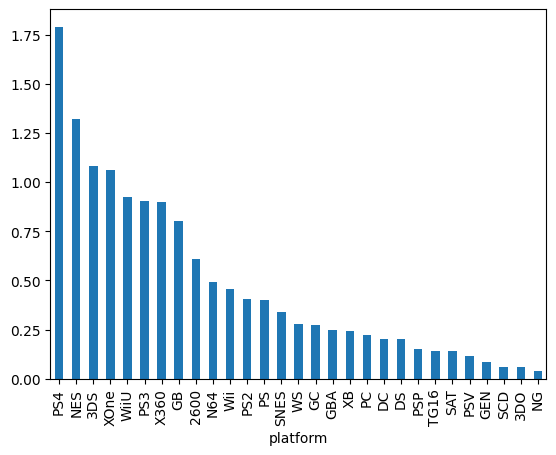

In [37]:
games_filtrada_final.groupby("platform")["ventas_totales"].mean().sort_values(ascending=False).plot(kind="bar")

#### Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. 

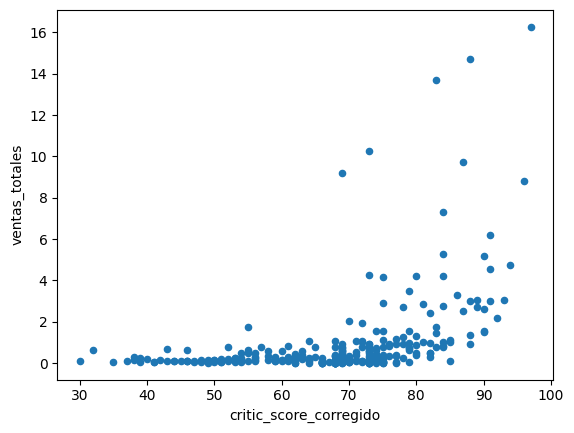

In [38]:
#Relación entre puntuación de profesionales y las ventas totales
games_filtrada_final[games_filtrada_final["platform"]=="X360"].plot(x='critic_score_corregido', y='ventas_totales', kind='scatter')
plt.show()

In [39]:
games_filtrada_final.query("platform == 'X360'")[["ventas_totales","critic_score_corregido"]].corr()

,ventas_totales,critic_score_corregido
ventas_totales,1.00000,0.43385
critic_score_corregido,0.43385,1.00000


Dado que nuestro coeficiente de correlación resultó 0.43, se determina que existe una correlación moderada entre la puntuación de la crítica y las ventas totales de la plataforma "X360"

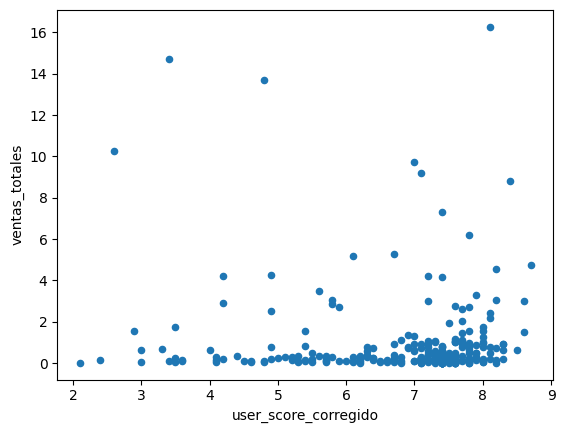

In [40]:
#Relación entre puntuación de usaurios y las ventas totales
games_filtrada_final[games_filtrada_final["platform"]=="X360"].plot(x='user_score_corregido', y='ventas_totales', kind='scatter')
plt.show()

In [41]:
games_filtrada_final.query("platform == 'X360'")[["ventas_totales","user_score_corregido"]].corr()

,ventas_totales,user_score_corregido
ventas_totales,1.000000,-0.082493
user_score_corregido,-0.082493,1.000000


Dado que nuestro coeficiente de correlación resultó 0.056, se determina que existe una correlación débil entre la puntuación de la crítica de usuarios y las ventas totales de la plataforma "X360"

#### compara las ventas de los mismos juegos en otras plataformas.

Tomaremos como referencia el juego vendido en mas plataformas: "FIFA 14"

In [42]:
games_filtrada_final.groupby("name")["platform"].nunique().sort_values(ascending=False)

name
Call of Duty: Ghosts                                               6
Just Dance 2017                                                    6
FIFA 16                                                            5
Assassin's Creed III                                               4
FIFA 15                                                            4
                                                                  ..
Hi! Hamtaro - Little Hamsters,big Adventures: Ham-Ham Challenge    1
Hidden Mysteries: Buckingham Palace                                1
High Heat Baseball 2002                                            1
High School Musical 3: Senior Year DANCE!                          1
¡Shin Chan Flipa en colores!                                       1
Name: platform, Length: 3575, dtype: int64

In [43]:
games_fifa14 = games_filtrada_final[games_filtrada_final["name"] == "FIFA 14"]
games_fifa14.groupby("platform")["ventas_totales"].sum().sort_values(ascending=False)


platform
PS3     6.46
X360    4.22
PS4     3.01
PSP     0.19
Name: ventas_totales, dtype: float64

Se observa que las plataformas en las que se comercializa en mayor cantidad el juego FIFA 14 son "PS3", "X360" y "PS4". En cuanto los últimos 3 lugares la diferencia es significativa respecto a las otras plataformas.

#### Distribución general de los juegos por género

<AxesSubplot:xlabel='ventas_totales', ylabel='genre'>

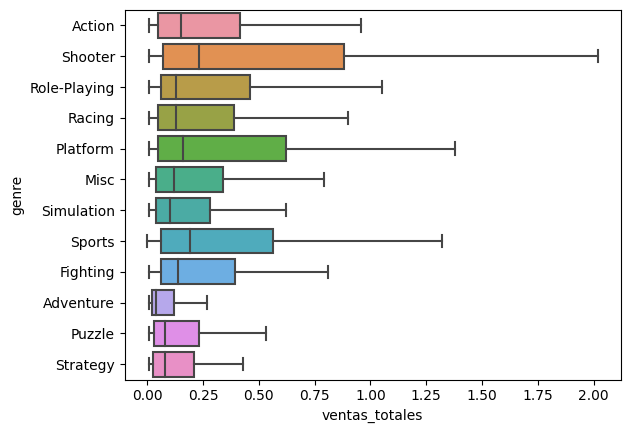

In [44]:
sns.boxplot(data = games_filtrada_final, x = "ventas_totales", y= "genre", showfliers = False)



De la distribución se observa que los juegos de  Plataforma, Rol y de Acción son los más preferidos por los usuarios, además sus ventas están sesgadas a la derecha, por lo que sus medias son mayores que la mediana. Por otro lado, los juegos de Aventura y Estrategia contituyen las preferencias más bajas.

### Crea un perfil de usuario para cada región

#### Las cinco plataformas principales por región

In [45]:
#Mercado plataformas Japón

market_jp = games_filtrada_final.groupby("platform").agg({"jp_sales":"sum"}).reset_index()
market_jp.sort_values(by = "jp_sales" , ascending = False).head(5)

,platform,jp_sales
2,3DS,55.88
4,DS,24.82
14,PS2,22.13
15,PS3,21.54
13,PS,20.50


In [46]:
#Mercado plataformas Unión europea
market_eu = games_filtrada_final.groupby("platform").agg({"eu_sales":"sum"}).reset_index()
market_eu.sort_values(by = "eu_sales" , ascending = False).head(5)

,platform,eu_sales
15,PS3,120.88
16,PS4,95.34
26,X360,79.69
14,PS2,54.18
2,3DS,39.40


In [47]:
#Mercado Norteamerica
market_na = games_filtrada_final.groupby("platform").agg({"na_sales":"sum"}).reset_index()
market_na.sort_values(by = "na_sales" , ascending = False).head(5)

,platform,na_sales
26,X360,162.51
15,PS3,121.47
14,PS2,92.54
24,Wii,75.94
16,PS4,71.39


De las tablas de oberva que las plataformas "DS", "PS2" y "Wii", están en el TOP 5 de las 3 regiones de análisis. La mayor cantidad de ventas de estas plataformas corresponde a la región de Norteamerica.

#### Los 5 generos principales por región

In [48]:
#Género Japon
genre_jp = games_filtrada_final.groupby("genre").agg({"jp_sales":"sum"}).reset_index()
genre_jp.sort_values(by = "jp_sales" , ascending = False).head(5)

,genre,jp_sales
7,Role-Playing,74.63
0,Action,35.35
10,Sports,21.85
2,Fighting,17.28
9,Simulation,14.78


In [49]:
#Genero Union europea
genre_eu = games_filtrada_final.groupby("genre").agg({"eu_sales":"sum"}).reset_index()
genre_eu.sort_values(by = "eu_sales" , ascending = False).head(5)

,genre,eu_sales
0,Action,148.43
8,Shooter,127.68
10,Sports,97.26
7,Role-Playing,49.91
3,Misc,43.16


In [50]:
#Género Norteamerica
genre_na = games_filtrada_final.groupby("genre").agg({"na_sales":"sum"}).reset_index()
genre_na.sort_values(by = "na_sales" , ascending = False).head(5)

,genre,na_sales
0,Action,201.66
8,Shooter,193.19
10,Sports,141.96
3,Misc,78.23
7,Role-Playing,76.24


De las tablas de oberva que los géneros "Action", "Sports" y "Misc", están en el TOP 5 de las 3 regiones de análisis. La mayor cantidad de ventas de estos géneros corresponde a la región de Norteamerica. Se destaca la alta preferencia de los juegos de rol para la región de Japon, la cual toma el primer lugar de sus preferencias (tambien ocupa el quinto lugar para Norteamerica)

#### Clasificación ESRB


In [51]:
#Calificación de Japon
calificacion_jp = games_filtrada_final.groupby(["rating"])["jp_sales"].sum().reset_index()
calificacion_jp.sort_values(by = "jp_sales" , ascending = False)



,rating,jp_sales
0,E,30.74
5,T,28.75
3,M,18.12
1,E10+,9.68
2,EC,0.00
4,RP,0.00


In [52]:
#Calificación Unión europea
calificacion_eu = games_filtrada_final.groupby(["rating"])["eu_sales"].sum().reset_index()
calificacion_eu.sort_values(by = "eu_sales" , ascending = False)

,rating,eu_sales
3,M,194.91
0,E,148.59
5,T,79.77
1,E10+,40.07
4,RP,0.01
2,EC,0.00


In [53]:
#Calificación de Norteamerica
calificacion_na = games_filtrada_final.groupby(["rating"])["na_sales"].sum().reset_index()
calificacion_na.sort_values(by = "na_sales" , ascending = False)

,rating,na_sales
3,M,252.42
0,E,232.76
5,T,143.15
1,E10+,82.35
2,EC,0.32
4,RP,0.00


Se observa que  para las 3 regiones de análisis, la clasificación "E" ocupa el primer lugar. Impulsar la venta de juegos de dicha clasificación podría traducirse en mayores ventas para el 2017. En tanto las clasificaciones "K-A", "RP", y "EC" parece no tener impacto en las ventas, dado que ocupan los últimos lugares.

### Pruebas de hipótesis

Hipotesis 1:

1. Formular la hipotesis nula y alternativa:
* HO: Las calificaciones promedio de los usuarios de Xbox One y PC son las mismas.
* H1: las calificaciones promedio .... son distintas.
2. Obtener la informacion que deseamos
* Necesitamos tener los datos en dos series separadas y SIN valores ausentes

In [54]:
score_xone = games_filtrada_final[games_filtrada_final['platform'] == 'XOne']['user_score_corregido'].dropna()
score_pc = games_filtrada_final[games_filtrada_final['platform'] == 'PC']['user_score_corregido'].dropna()

* Necesitamos realizar una prueba de Levene para verificar si varianzas son iguales o no.

In [55]:
from scipy.stats import levene


# Realizar la prueba de Levene
estadistico, p_valor = levene(score_xone, score_pc)

# Mostrar los resultados
print("Estadístico de Levene:", estadistico)
print("P-valor:", p_valor)

if p_valor > 0.05:
    print("No se rechaza la hipótesis nula. Las varianzas son iguales.")
else:
    print("Se rechaza la hipótesis nula. Las varianzas son diferentes.")


Estadístico de Levene: 0.2701255394508093
P-valor: 0.603575176425442
No se rechaza la hipótesis nula. Las varianzas son iguales.


3. definir el test y el nivel de significancia.
- Usamos el nivel de significancia estandar de $\alpha$ de 0.5
- Comparar dos categorias (XOne y PC) con respecto a una variable numerica (User Score), en donde desconoces las
desviaciones standar por lo que podemos usar el t-test.

In [56]:
from scipy.stats import ttest_ind

In [57]:
alpha = 0.05
stat, p_value = ttest_ind(
score_xone,
score_pc
)
print(f"""
    La clasificación promedio de profesionales para la Xbox es: {score_xone.mean()}
    La clasificación promedio de profesionales para la PC es: {score_pc.mean()}
    
    t-statistic: {stat}
    p-value: {p_value}
""")
    
if p_value < alpha:
    print('Rechazamos nuestra hipótesis nula')
else:
    print('No rechazamos nuestra hipótesis nula')


    La clasificación promedio de profesionales para la Xbox es: 6.83846153846154
    La clasificación promedio de profesionales para la PC es: 7.198545454545454
    
    t-statistic: -2.1705531898912094
    p-value: 0.03063486483292931

Rechazamos nuestra hipótesis nula


Hipotesis 2:

1. Formular la hipotesis nula y alternativa:
* HO: Las calificaciones promedio de los usuarios para los generos acción y deporte son las mismas.
* H1: las calificaciones promedio .... son distintas.
2. Obtener la informacion que deseamos
* Necesitamos tener los datos en dos series separadas y SIN valores ausentes

In [58]:
score_action = games_filtrada_final[games_filtrada_final['genre'] == 'Action']['user_score_corregido'].dropna()
score_sports = games_filtrada_final[games_filtrada_final['genre'] == 'Sports']['user_score_corregido'].dropna()

* Necesitamos realizar una prueba de Levene para verificar si varianzas son iguales o no.

In [59]:
# Realizar la prueba de Levene
estadistico, p_valor = levene(score_action, score_sports)

# Mostrar los resultados
print("Estadístico de Levene:", estadistico)
print("P-valor:", p_valor)

if p_valor > 0.05:
    print("No se rechaza la hipótesis nula. Las varianzas son iguales.")
else:
    print("Se rechaza la hipótesis nula. Las varianzas son diferentes.")

Estadístico de Levene: 0.3068008203775381
P-valor: 0.5797387682522979
No se rechaza la hipótesis nula. Las varianzas son iguales.


3. definir el test y el nivel de significancia.
- Usamos el nivel de significancia estandar de $\alpha$ de 0.5
- Comparar dos categorias (Action y Sports) con respecto a una variable numerica (User Score), en donde desconoces las
desviaciones standar por lo que podemos usar el t-test.

In [60]:
alpha = 0.05
stat, p_value = ttest_ind(
score_action,
score_sports,
)
print(f"""
    La clasificación promedio de profesionales para la Xbox es: {score_action.mean()}
    La clasificación promedio de profesionales para la PC es: {score_sports.mean()}
    
    t-statistic: {stat}
    p-value: {p_value}
""")
    
if p_value < alpha:
    print('Rechazamos nuestra hipótesis nula')
else:
    print('No rechazamos nuestra hipótesis nula')


    La clasificación promedio de profesionales para la Xbox es: 7.214893617021278
    La clasificación promedio de profesionales para la PC es: 7.2508166969147005
    
    t-statistic: -0.6339651608518411
    p-value: 0.5262074941329847

No rechazamos nuestra hipótesis nula


### Conclusiones

Luego de analizar los datos históricos referente a juegos, se observó que del año 2000 hacia atrás el volumen de las ventas es bajo, por lo que la mayor parte del análisis se hace posterior a este periodo . Por otro lado se observa que existen años con picos de venta, llegando a este nivel luego de 2 a 3 años después del lanzamiento de alguna plataforma al mercado. A partir de ese periodo la cantidad de lanzamientos por plataforma comienza a decrecer hasta desaparecer en la mayor parte de los casos. Solo hay algunos casos donde hay fidelidad de parte los usuarios por seguir utilizando ciertas plataformas a pesar del inicio de su lanzamiento, como en el caso de la plataforma "PC", donde la cantidad de compras de los usuarios se mantiene con cierta estabilidad con el pasar de los años. Esto nos indica que a pesar de que no sea una plataforma que lidere en ventas, si puede ser aceptable la idea de invertir recursos para impulsar sus ventas.

Tambien el estudio ha arrojado que las plataformas líderes en ventas son "PS2","X360","PS3","Wii"y "DS" mientras que los géneros preferidos por los usuarios Plataforma, Rol y de Acción.

Podemos ver que la distribución de la plataforma "GB" está sesgada hacia la derecha, lo que indica que la media será mayor que la mediana. Esto también implica que los usuarios que prefieren esta platadorma terminan gastando grandes cantidades de dinero; podríamos promocionar versiones mas actualizadas para atraer a estas personas a preferir esta consola.

Tambien se observa que la plataforma "NES" es la que presenta mayor media, pero una variabilidad bastante alta y similar a la plataforma GB. Otras plataformas que presentan mayor homogeneidad en sus datos respecto a sus rivales serían "X360" y "PS3", lo cual tambien sería conveniente apuntar su estrategia comercial de cara al año 2017, dado que son consolas altamente preferidas por los susuarios.

Por último los géneros "Action", "Sports" y "Misc", están en el TOP 5 de las 3 regiones de análisis. La mayor cantidad de ventas de estos géneros corresponde a la región de Norteamerica. Se destaca la alta preferencia de los juegos de rol para la región de Japon, la cual toma el primer lugar de sus preferencias (tambien ocupa el quinto lugar para Norteamerica)